# The Environmental Effects of the 2017 Thomas Fire

Author: Ian Morris-Sibaja

This project can be found at [https://github.com/imsibaja/eds222-final-project](https://github.com/imsibaja/eds222-final-project)

##  About: 

### Purpose:

This notebook explores the 2017 Thomas Fire, one of California's largest wildfires, which burned over 280,000 acres across Ventura and Santa Barbara counties, causing extensive environmental damage, including vegetation loss, soil erosion, and increased flood risks. This notebook examines the fire's impact on air quality using AQI data from the US Environmental Protection Agency and visualizes burn severity and fire scars using false-colored Landsat multispectral geospatial data.

### Highlights:

- Import and explore AQI and Landsat data to analyze the Thomas Fires
- Create time series maps to explore the impact of the wildfires on AQI
- Create true and false color images to highlight the fire's bredth
- Visualize the false color fire scar alongside perimeter data for detailed analysis

### About the data: 

#### U.S. Air Quality Index (AQI)

The U.S. Air Quality Index (AQI), developed by the EPA, communicates outdoor air quality and associated health risks through six color-coded categories, ranging from "Good" (AQI ≤ 50) to "Hazardous" (AQI > 300). AQI values up to 100 indicate satisfactory air quality, aligned with national health standards, while values above 100 signal unhealthy conditions—initially for sensitive groups and eventually for all as pollution levels rise. The color-coded system enables quick identification of air quality concerns in communities.


#### Landset 8 Satellite Collection

This dataset consists of simplified bands (red, green, blue, near-infrared, and shortwave infrared) from Landsat Collection 2 Level-2 surface reflectance data, which was atmospherically corrected and captured by NASA's Landsat 8 satellite. It was sourced from the Microsoft Planetary Computer data catalog and preprocessed to exclude non-land areas and reduce spatial resolution for ease of computation.

### Objectives:
- Wrangle date and string data and combine data frames for analysis
- Visualize time series and create polished workflows
- Manipulate raster and vector data using Rasterio and GeoPandass  
- Implement Git for version control following best practices
- Ensure collaboration and reproducibility with structured workflows

### References: 
[Landsat Data](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2) from Microsoft's Planetary Computer Data Catalogue,
[AQI Data](https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI) from the EPA's daily AQI summaries

- Earth Resources Observation and Science (EROS) Center. (2020). Landsat 4-5 Thematic Mapper Level-2, Collection 2. U.S. Geological Survey. https://doi.org/10.5066/P9IAXOVV
- Earth Resources Observation and Science (EROS) Center. (2020). Landsat 7 Enhanced Thematic Mapper Plus Level-2, Collection 2. U.S. Geological Survey. https://doi.org/10.5066/P9C7I13B
- Earth Resources Observation and Science (EROS) Center. (2020). Landsat 8-9 Operational Land Imager / Thermal Infrared Sensor Level-2, Collection 2. U.S. Geological Survey. https://doi.org/10.5066/P9OGBGM6

Galaz García, Carmen. Assignment4 – EDS 220 - Working with Environmental Datasets. (n.d.). https://meds-eds-220.github.io/MEDS-eds-220-course/assignments/assignment4.html

## Import Data and Modules

In [44]:
# Import modules
import rioxarray as rioxr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [45]:
# Import api data
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip",
                     compression="zip")
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip",
                     compression="zip")

In [46]:
# Import landsat data
landsat_fp = os.path.join("data", "landsat8-2018-01-26-sb-simplified.nc")
landsat_df = rioxr.open_rasterio(landsat_fp)

thomas_fp = os.path.join("data", "thomas_2017.geojson")
thomas_2017 = gpd.read_file(thomas_fp)

## Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

### Preliminary Exploration
We would like to begin this section by excecuting preliminary explorations of our data.

In [47]:
# View first five rows
aqi_17_head = aqi_17.head()
aqi_18_head = aqi_18.head()

In [48]:
aqi_17_head

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1


In [49]:
aqi_18_head

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,42,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,45,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,20,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,25,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,33,Good,PM2.5,01-003-0010,1


In [50]:
# Compare the differing shapes
print(aqi_17.shape, aqi_18.shape)
# Print statement equating each dataframe columns and dtypes
print(aqi_17.dtypes == aqi_18.dtypes)

(326801, 10) (327543, 10)
State Name                   True
county Name                  True
State Code                   True
County Code                  True
Date                         True
AQI                          True
Category                     True
Defining Parameter           True
Defining Site                True
Number of Sites Reporting    True
dtype: bool


We started by examining the shape and data types of each dataframe to assess their compatibility for comparison. This step is crucial for ensuring the legitimacy of directly analyzing these two datasets together. Lucky for us, the dataframes share identical columns with matching data types. This consistency allows for seamless comparison and concatenation, aiding in our analysis.

### Data Preprocessing

To aid in our comparisons, we begin by cleaning up our data.

In [51]:
# Concatenate the two dataframes together
aqi = pd.concat([aqi_17, aqi_18])
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,28,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,29,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,25,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,40,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,22,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327538,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327539,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327540,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327541,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


In [52]:
# Initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# Simplify column names
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_')
                )
print(aqi.columns, '\n')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object') 



Concatenating and cleaning our column names help us create a clean dataframe that will aid in filtering. We want to filter for Santa Barbara only and our necessary column names.

In [53]:
# Filter AQI to only Santa Barbara
aqi_sb = aqi[aqi["county_name"] == "Santa Barbara"]
# Drop unnecessary columns
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code', 'county_code'])

# Find data type of date column
date_type = aqi_sb["date"].dtype
# Update the date column to be pd.datetime object
aqi_sb.date = pd.to_datetime(aqi_sb.date)
# Update index to the date column
aqi_sb = aqi_sb.set_index("date")
aqi_sb.sort_index(inplace=True)

Now with our data cleaned, we can begin with our analysis. We want to calculate the AQI average over a 5 day rolling window.

In [54]:
# Calculate AQI rolling average over 5 days
rolling_average = aqi_sb["aqi"].rolling("5D").mean()
# Add rolling mean to SB dataframe
aqi_sb["five_day_average"] = rolling_average.values

Hooray! We have completed our data cleaning and now we have a easy to plot data frame full of rolling average values. All we have left is to...


### Visualize Our Rolling Average

<Axes: title={'center': 'Daily and Rolling Average AQI\nof Santa Barbara County from 2017-18'}, xlabel='Date', ylabel='PM 2.5'>

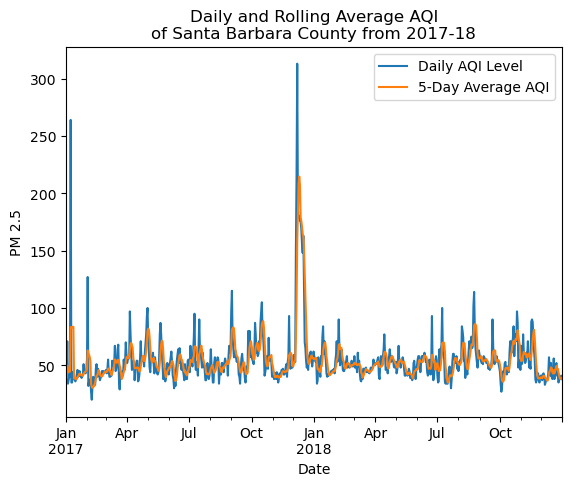

In [55]:
# Visualize the AQI data
aqi_sb.plot(kind="line",
            y=["aqi", "five_day_average"],
            xlabel="Date",
            ylabel="PM 2.5",
            label=["Daily AQI Level", "5-Day Average AQI"],
            title="Daily and Rolling Average AQI\nof Santa Barbara County from 2017-18")

As you can see, there is a large spike in PM 2.5 during the same time frame of the Thomas Fire in late 2017. Next, we will visualize the fire scars left by the fire using landsat data and false color imagery.

## Thomas Fire False Color

### Step 1: Explore the Data
We will examine the dataset to understand its structure. After exploring the data, we will summarize in paragraph form.

In [56]:
# Show preliminary xarrary.Dataset
landsat_df

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

In [57]:
# Show dimensions of dataset 
print(landsat_df.dims)

FrozenMappingWarningOnValuesAccess({'band': 1, 'x': 870, 'y': 731})


In [58]:
# Show CRS of dataset 
print(landsat_df.rio.crs)

EPSG:32611


In [59]:
# Show datatypes of dataset 
print(landsat_df.dtypes)

Frozen({'red': dtype('float64'), 'green': dtype('float64'), 'blue': dtype('float64'), 'nir08': dtype('float64'), 'swir22': dtype('float64')})


#### Data Summary

This dataset is a 2D dataset with a single band. There are five wavelength ranges captures, red, green, blue, near infrared and short wave infrared. The dataset is of CRS EPSG:32611.

### Step 2: Drop the Band Dimension

To ease visualizations, we will simplify the dataset by removing unnecessary dimensions.

In [60]:
# Drop band dimension of data
landsat_df = landsat_df.drop_vars("band").squeeze()

In [61]:
# View updated dataset
landsat_df.head()

<xarray.Dataset> Size: 1kB
Dimensions:      (x: 5, y: 5)
Coordinates:
  * x            (x) float64 40B 1.213e+05 1.216e+05 ... 1.221e+05 1.224e+05
  * y            (y) float64 40B 3.952e+06 3.952e+06 ... 3.952e+06 3.951e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float64 200B ...
    green        (y, x) float64 200B ...
    blue         (y, x) float64 200B ...
    nir08        (y, x) float64 200B ...
    swir22       (y, x) float64 200B ...

### Step 3: Select RGB Bands

By extracting the red, green, and blue bands we can begin to create an RGB image.

In [62]:
# Filter AQI to only Santa Barbara
aqi_sb = aqi[aqi["county_name"] == "Santa Barbara"]
# Drop unnecessary columns
aqi_sb = aqi_sb.drop(columns=['state_name', 'county_name', 'state_code', 'county_code'])

Converting the dataframe to an array will easily allow us to plot using the `plot.imshow()` method.

In [63]:
# Convert to array
landsat_df[["red", "green", "blue"]].to_array()

<xarray.DataArray (variable: 3, y: 731, x: 870)> Size: 15MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
  * variable     (variable) object 24B 'red' 'green' 'blue'

### Step 4: Visualize
Now we will plot the RGB data to visualize it as a true color image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


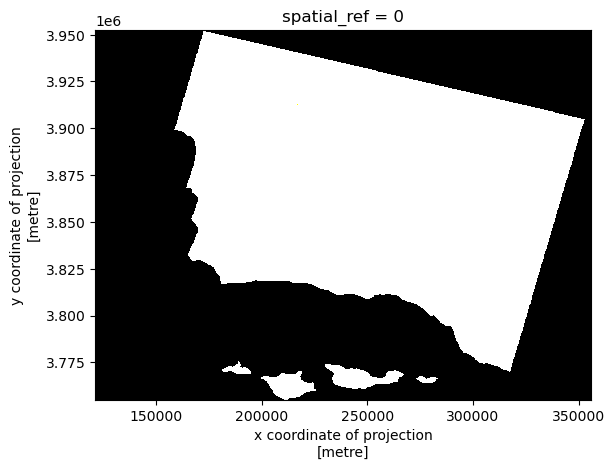

In [64]:
# Visualize with simple plot
landsat_df[["red", "green", "blue"]].to_array().plot.imshow()

#### What happened? 

Well we did not alter the `robust` parameter. Let's set it to `True` and see what happens!

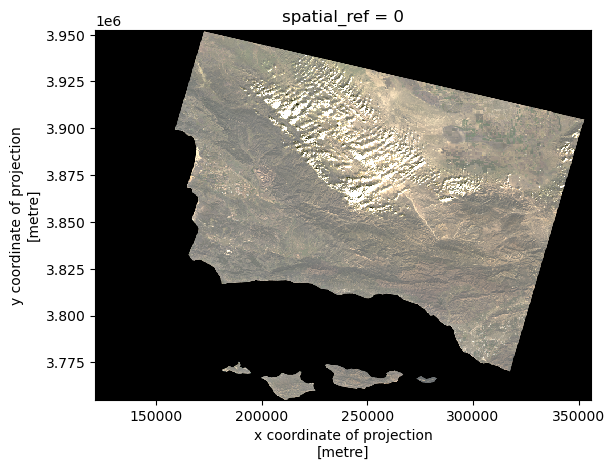

In [65]:
# Visualize with true color plot
landsat_df[["red", "green", "blue"]].to_array().plot.imshow(robust=True)

#### Plot Summary

The output of a) shows a black and white outline of the area we are working with, while b) shows us a more true to color rendering. The `robust=True` parameter that we added will eliminate any outliers that may alter the data. It uses 2nd and 98th percentiles of the data to compute the color limits.

#### False color image
   
To visualize specific features like vegetation health or fire impacts, we can create false color imagery using the red, near infrared, and short wave infrared bands.

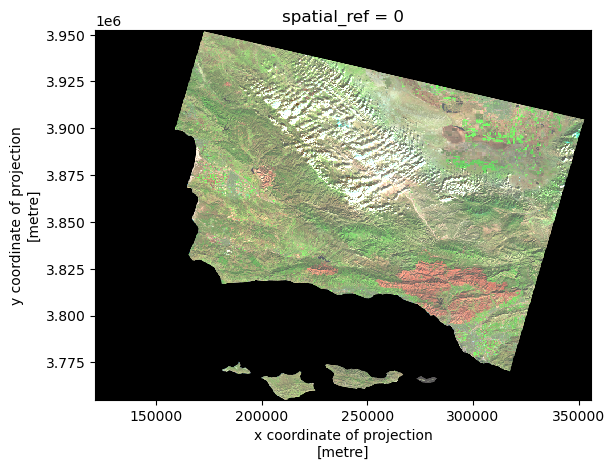

In [66]:
# Visualize with false color plot
landsat_df[["swir22", "nir08", "red"]].to_array().plot.imshow(robust=True)

### Step 6: Map the False Color Image with Fire Perimeter

Lastly, we can overlay the false color imagery with critical geographical features like the fire perimeters we imported before. 

In [67]:
# Compare CRS
print(landsat_df.rio.crs)
print(thomas_2017.crs)

EPSG:32611
EPSG:4326


In [68]:
# Reproject AOI to RGB CRS
thomas_2017 = thomas_2017.to_crs(landsat_df.rio.crs)
print('Matched CRS?:',  landsat_df.rio.crs == thomas_2017.crs)

Matched CRS?: True


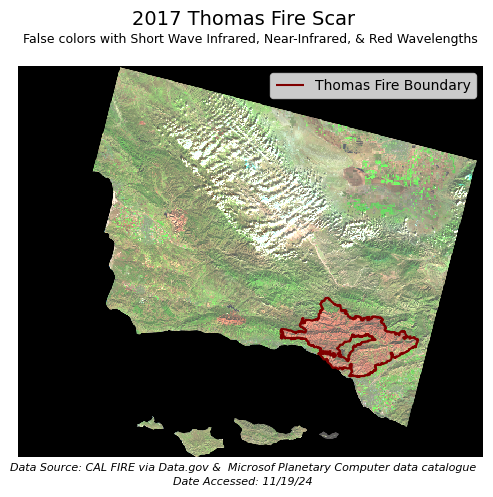

In [69]:
# Plot of false color raster with buffer overlay
fig, ax = plt.subplots(figsize=(6, 7))  # Directly set size and aspect
landsat_df[["swir22", "nir08", "red"]].to_array().plot.imshow(
                robust=True,
                ax=ax)
thomas_2017.boundary.plot(ax=ax, color="maroon")
ax.axis("off")
ax.legend(["Thomas Fire Boundary"])
fig.suptitle("2017 Thomas Fire Scar", color = 'black', fontsize = 14, fontweight='light', y=0.855)
ax.set_title("False colors with Short Wave Infrared, Near-Infrared, & Red Wavelengths", fontsize=9)
fig.text(x=.5,y=.2,
        s='Data Source: CAL FIRE via Data.gov &  Microsof Planetary Computer data catalogue',
        ha='center', va='center', fontsize=8, color='black', fontstyle='italic')
fig.text(x=.5,y=.18,
        s='Date Accessed: 11/19/24',
        ha='center', va='center', fontsize=8, color='black', fontstyle='italic')
plt.show()

#### Figure Description
This map uses false-color imagery to highlight vegetation and fire-affected areas within the Thomas Fire boundary from 2017. In this visualization, near-infrared (NIR) is represented as green, shortwave infrared (SWIR) as red, and red light as blue. Healthy vegetation strongly reflects NIR, making those areas appear green, while it absorbs red and SWIR wavelengths. Burned areas, often rich in iron oxides, reflect SWIR more strongly, appearing red in the image. This method helps distinguish fire scars and vegetation loss more effectively compared to true-color images, which use visible red, green, and blue wavelengths and may not clearly show such contrasts.